<a href="https://colab.research.google.com/github/azizeko29/new_deteksi_fraud/blob/master/ULB_UnderSampling_PemodelanRF_FeatureImportance_pemodelan_klasik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math
import collections
import time
from scipy import stats

In [2]:
# %matplotlib inline
# from IPython.display import display
# from sklearn import metrics
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from statistics import stdev

from sklearn import tree

from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
# np.random.seed(1)

In [0]:
def confussion_matrik(actual,predict):
    TP,FP,FN,TN = 0,0,0,0
    for i,val in enumerate(actual):
        if val == 0:
            if val == predict[i]:
                TN += 1
            else:
                FP += 1
        if val == 1:
            if val == predict[i]:
                TP += 1
            else:
                FN += 1
    return TP,FP,FN,TN
 
def acc_sens_spec(actual,predict):
    TP,FP,FN,TN = confussion_matrik(actual,predict)
# akurasi
    if (TP+FP+FN+TN) == 0 :
        accuracy = 0 
    else :
        accuracy = (TP+TN)/(TP+FP+FN+TN)
        
# sensitivity
    if (TP+FN) == 0 :
        sensitivity = 0
    else :
        sensitivity = TP/(TP+FN)
        
# specifity    
    if (TN +FP) == 0 :
        specifity = 0
    else :
        specifity = TN/(TN +FP)
        
# precision
    if (TP+FP) == 0 :
        precision = 0
    else :
        precision = TP/(TP+FP)

# recall
    recall = sensitivity

# f1_score
    if (precision+recall) == 0 :
        f1_score = 0
    else :
        f1_score = 2*((precision*recall)/(precision+recall))  
    
    return accuracy,sensitivity,specifity,precision,recall,f1_score

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    #how many correct predictions?
    correct = 0
    #for each actual label
    for i in range(len(actual)):
        #if actual matches predicted label
        if actual[i] == predicted[i]:
            #add 1 to the correct iterator
            correct += 1
    #return percentage of predictions that were correct
    return correct / float(len(actual)) * 100.0

In [0]:
# confussion_matrik(y,pred)

In [0]:
# accuracy,sensitivity,specifity = acc_sens_spec(y,pred)
# print('acc',accuracy)
# print('sens',sensitivity)
# print('spec',specifity)

In [0]:
# accuracy_metric(y,RF.predict(X))

In [0]:
def cross_val_split(X,fold=2,seed=0):
    np.random.seed(seed)
    n_folds= fold
    size = X.shape[0]/n_folds
    X_idx = list(range(X.shape[0]))
    folds_data= []
    for i in range(n_folds):
#         print(X_idx)
        random_idx = list(np.random.choice(X_idx,int(size),replace=False))
#         print(random_idx)
        X_idx = [idx for idx in X_idx if idx not in random_idx]
#         print(X_idx)

        folds_data.append(random_idx)
#         print("--")
    return folds_data

def kfold_cross_validation(model,X,y, n_fold=2, n_seed=0):
    folds = cross_val_split(X,fold=n_fold,seed=n_seed)
    fold_result =[]
    for i in range(len(folds)):
    #     print(i)
        train = []
        for j in range(len(folds)):
            if j != i:
                train = train + folds[j]
        test = folds[i]

        X_train = X.iloc[train,:].reset_index(drop=True)
        y_train = y[train].reset_index(drop=True)

        X_test = X.iloc[test,:].reset_index(drop=True)
        y_test = y[test].reset_index(drop=True)


        t0 = time.time()
        model.fit(X_train, y_train)
        t1 = time.time()
        waktu = t1 - t0

        predict = model.predict(X_test)
        accuracy,sensitivity,specifity,precision,recall,f1_score = acc_sens_spec(y_test,predict)

        result = [accuracy,sensitivity,specifity,precision,recall,f1_score,waktu]
        fold_result.append(result)
        
    return fold_result

In [0]:
from sklearn.decomposition import PCA
import pylab as pl
def plot_this(X_rs,y_rs,method):
  # Use principal component to condense the 10 features to 2 features
  pca = PCA(n_components=2).fit(X_rs)
  pca_2d = pca.transform(X_rs)
  # Assign colors
  for i in range(0, pca_2d.shape[0]):
    if y_rs[i] == 0:
      c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='o')
    elif y_rs[i] == 1:
      c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='*')  
  pl.legend([c1, c2], ['Class 1', 'Class 2'])
  pl.title(method)
  pl.axis([-4, 5, -4, 4])  # x axis (-4,5), y axis (-4,4)
  pl.show()
    


## ---------

In [0]:
##read data

# df = pd.read_csv('data/creditcard_ulb.csv',sep=",")
# # df = pd.read_csv('data/sample_data.csv',sep=",")

# df0 = df.copy()
# df.info()

In [11]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1PqCaaZwbyxrFdhLLPFB0TM9Z4jcP7LPo' # The shareable link

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('creditcard_ulb.csv')  
read_df = pd.read_csv('creditcard_ulb.csv')
# Dataset is now stored in a Pandas Dataframe
# df.info()

1PqCaaZwbyxrFdhLLPFB0TM9Z4jcP7LPo


In [0]:
df = read_df.copy()

In [13]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [15]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

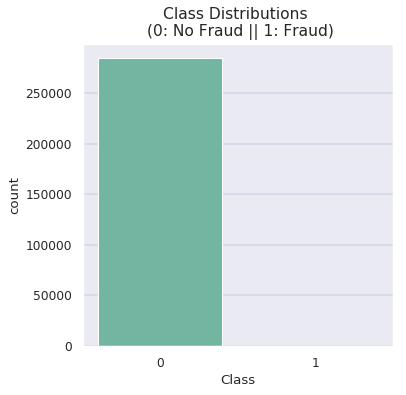

In [16]:
plt.figure(1,figsize=(5, 5), dpi=80)
plt.grid(color='b', linestyle='-', linewidth=0.2)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
sns.countplot('Class', data=df,palette='Set2')


In [17]:
count = 0
for a in df.columns[1:]:
    if df[a].isnull().sum() > 0 :
#         print(a)
        count+=1
count

0

In [0]:
# from imblearn.under_sampling import (RandomUnderSampler, 
#                                      ClusterCentroids,
#                                      TomekLinks,
#                                      NeighbourhoodCleaningRule,
#                                      NearMiss)

In [0]:
# # Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
# from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# # RobustScaler is less prone to outliers.

# std_scaler = StandardScaler()
# rob_scaler = RobustScaler()
# minmax_scaler = MinMaxScaler()

# # df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
# # df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# df['scaled_amount'] = minmax_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
# df['scaled_time'] = minmax_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# df.drop(['Time','Amount'], axis=1, inplace=True)

# scaled_amount = df['scaled_amount']
# scaled_time = df['scaled_time']

# df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
# df.insert(0, 'scaled_amount', scaled_amount)
# df.insert(1, 'scaled_time', scaled_time)

# # Amount and Time are Scaled!

# df.head()

In [20]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples
df_copy = df.copy()
# df_copy = df_copy.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df_copy.loc[df_copy['Class'] == 1]
non_fraud_df = df_copy.loc[df['Class'] == 0][:492]
non_fraud_df = df_copy.loc[df_copy['Class'] == 0].sample(n=492,random_state=1)

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
df_new = normal_distributed_df.sample(frac=1, random_state=1)
df_new = df_new.reset_index()
df_new = df_new.drop('index', axis=1)
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,128627.0,-0.865285,-0.979506,2.587540,-2.781144,-0.887336,-0.579689,-0.976755,0.132058,-1.658263,0.335742,-1.256944,-0.910902,0.767742,-1.122642,-0.540790,0.030130,0.106431,0.327877,-0.874734,-0.211955,-0.106978,-0.010528,-0.211955,0.021026,0.358237,-0.209483,0.062051,0.074730,8.00,0
1,70536.0,-2.271755,-0.457655,-2.589055,2.230778,-4.278983,0.388610,0.102485,0.813128,-1.092921,-5.032028,3.510348,-2.227398,0.656824,-5.199186,-0.128311,-3.943521,-3.820522,-0.570821,2.783383,2.285758,1.096342,0.658399,1.711676,0.333540,0.538591,-0.193529,0.258194,0.247269,824.83,1
2,166831.0,-2.027135,-1.131890,-1.135194,1.086963,-0.010547,0.423797,3.790880,-1.155595,-0.063434,1.334414,1.032016,-0.722023,-1.533240,0.334119,0.297479,-0.429392,-0.824644,0.489668,0.873344,0.033804,-0.315105,0.575520,0.490842,0.756502,-0.142685,-0.602777,0.508712,-0.091646,634.30,1
3,75987.0,0.531678,-1.108844,0.276972,0.386453,-1.038906,-0.810526,0.395582,-0.322635,0.068460,-0.379352,0.027938,0.964578,1.555891,-0.046948,1.142469,0.483455,-0.462960,-0.606466,-0.124976,0.801043,0.000589,-0.824566,-0.174821,0.479535,-0.094335,0.698329,-0.130716,0.083227,386.60,0
4,136908.0,1.878626,0.162765,-0.167433,3.465196,0.197332,1.157212,-0.676783,0.473890,-0.386278,1.592102,-0.434179,-0.728119,-1.803685,0.416732,-0.806753,1.813132,-1.356800,0.618755,-1.030612,-0.342723,-0.217428,-0.785738,0.406279,-0.056071,-0.560484,-0.388620,-0.012717,-0.038421,5.99,0


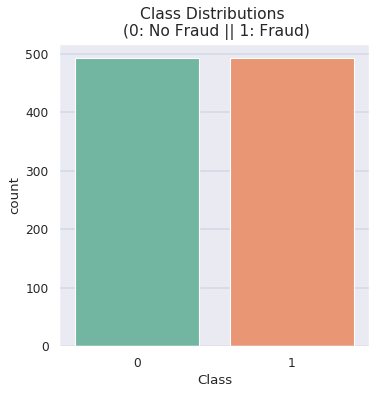

In [21]:
plt.figure(1,figsize=(5, 5), dpi=80)
plt.grid(color='b', linestyle='-', linewidth=0.2)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
sns.countplot('Class', data=df_new,palette='Set2')

In [0]:
# X = df.drop('Class', axis=1)
# y = df['Class'].copy()

In [0]:
X_new = df_new.drop('Class', axis=1)
y_new = df_new['Class'].copy()

In [24]:
y_new.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [25]:
X_new.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [0]:
# from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# # RobustScaler is less prone to outliers.

# std_scaler = StandardScaler()
# rob_scaler = RobustScaler()
# minmax_scaler = MinMaxScaler()

# X_neww = minmax_scaler.fit_transform(X_new)
# X_new = pd.DataFrame(X_neww, columns=X_new.columns)
# X_new.tail()

# # SKLearn


In [27]:
from sklearn.ensemble import RandomForestClassifier
n_tree = 10
clf = RandomForestClassifier(random_state=1,n_estimators=n_tree, max_features='sqrt')
clf.fit(X_new,y_new)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [28]:
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier(random_state=1)
clf_DT.fit(X_new,y_new)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [0]:
def run_skenarion_1 (clf,X,y,kfolds):
    CV_SKLearn = kfold_cross_validation(clf,X,y,n_fold=kfolds,n_seed=1)
    df_result = pd.DataFrame(data= CV_SKLearn, columns=['Akurasi','Sensitivity','Specifity','precision','recall','f1_score','Waktu'])

    df_result.insert(loc=0, column='No', value=list(range(1,df_result.shape[0]+1)))
    df_result = df_result.set_index('No')

    del df_result.index.name

    df_result = df_result.append(df_result.describe()[1:2])
    
    return df_result
# result_SKLearn = result_SKLearn.append('')

In [30]:
result_SKLearn = run_skenarion_1(clf,X_new,y_new,5)
result_SKLearn

,Akurasi,Sensitivity,Specifity,precision,recall,f1_score,Waktu
1,0.918367,0.861702,0.970588,0.964286,0.861702,0.910112,0.028077
2,0.933673,0.915094,0.955556,0.960396,0.915094,0.937198,0.031926
3,0.964286,0.936842,0.990099,0.988889,0.936842,0.962162,0.038445
4,0.913265,0.870968,0.951456,0.941860,0.870968,0.905028,0.038290
5,0.933673,0.891089,0.978947,0.978261,0.891089,0.932642,0.037704
mean,0.932653,0.895139,0.969329,0.966738,0.895139,0.929429,0.034888


In [31]:
result_SKLearn = run_skenarion_1(clf_DT,X_new,y_new,5)
result_SKLearn

,Akurasi,Sensitivity,Specifity,precision,recall,f1_score,Waktu
1,0.862245,0.840426,0.882353,0.868132,0.840426,0.854054,0.027140
2,0.882653,0.886792,0.877778,0.895238,0.886792,0.890995,0.019147
3,0.923469,0.926316,0.920792,0.916667,0.926316,0.921466,0.025182
4,0.882653,0.903226,0.864078,0.857143,0.903226,0.879581,0.016680
5,0.918367,0.940594,0.894737,0.904762,0.940594,0.922330,0.014739
mean,0.893878,0.899471,0.887947,0.888388,0.899471,0.893685,0.020578


In [0]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

clf_LR = LogisticRegression()
clf_KNN = KNeighborsClassifier()
clf_SVM = SVC()
clf_NB = GaussianNB()
clf_DT_ = DecisionTreeClassifier(random_state=1)
clf_RF = RandomForestClassifier(random_state=1,n_estimators=10)
##skenario 
skenario_1 = {}
skenario_1['1'] = clf_LR
skenario_1['2'] = clf_KNN
skenario_1['3'] = clf_SVM
skenario_1['4'] = clf_NB
skenario_1['5'] = clf_DT_
skenario_1['6'] = clf_RF

In [0]:
# for i in skenario_1:
    
#     if isinstance(skenario_1[i], tuple) :
#         clf_skenario = skenario_1[i][0][0]
#     else :
#         clf_skenario = skenario_1[i]
# #     print('komposisi', i)

    
#     result_SKLearn = run_skenarion_1(clf_skenario,X_new,y_new,5)
# #     print(result_SKLearn)
    
#     nama_file = 'hasil/skenario1/random/komposisi999.csv'
#     nama_file = nama_file.replace('999',str(i))

#     result_SKLearn.to_csv(nama_file, sep=';',index=False)
                


In [33]:
result = {}
for i in skenario_1:
#     print('komposisi', skenario_1[i])
  
    clf_skenario = skenario_1[i]

#     result_SKLearn = run_skenarion_1(clf_skenario,X_new,y_new,5)
#     print(result_SKLearn)

    result[i] = run_skenarion_1(clf_skenario,X_new,y_new,5)
    
#     nama_file = 'komposisi999.csv'
#     nama_file = nama_file.replace('999',str(i))

#     result_SKLearn.to_csv(nama_file, sep=';',index=False)
#     !cp komposisi1.csv drive/My\ Drive/
                


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [0]:
# df_result = pd.DataFrame()
# for i in skenario_1:
#     nama_file = 'hasil/skenario1/random/komposisi999.csv'
#     nama_file = nama_file.replace('999',str(i))
#     df_komposisi = pd.read_csv(nama_file,sep=";")
#     df_result = df_result.append(df_komposisi.iloc[5:,:])
    
# df_result.insert(loc=0, column='No', value=list(range(df_result.shape[0])))
# df_result = df_result.set_index('No')

# del df_result.index.name

# df_result.to_csv('hasil/skenario1/random/result.csv', sep=';',index=False)
# df_result

In [35]:
df_result = pd.DataFrame()
for i in skenario_1:
    df_result = df_result.append(result[i].iloc[5:,:])
    
df_result.insert(loc=0, column='No', value=list(range(df_result.shape[0])))
df_result = df_result.set_index('No')

del df_result.index.name

df_result

,Akurasi,Sensitivity,Specifity,precision,recall,f1_score,Waktu
0,0.935714,0.893936,0.977376,0.975519,0.893936,0.932770,0.015822
1,0.652041,0.643023,0.663599,0.656362,0.643023,0.648069,0.002428
2,0.544898,0.087760,1.000000,1.000000,0.087760,0.161051,0.062340
3,0.865306,0.745954,0.983404,0.979102,0.745954,0.846334,0.002248
4,0.893878,0.899471,0.887947,0.888388,0.899471,0.893685,0.018405
5,0.932653,0.895139,0.969329,0.966738,0.895139,0.929429,0.031633


In [36]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
fitur_importance =[]
for f in range(X_new.shape[1]):
    if  importances[indices[f]] > 0 :
        fitur_importance.append([X_new.columns[indices[f]],importances[indices[f]]])
        print("%2d) %-*s %f" % (f + 1, 30,
        X_new.columns[indices[f]],
        importances[indices[f]]))

 1) V14                            0.191396
 2) V4                             0.156735
 3) V17                            0.154208
 4) V12                            0.153089
 5) V11                            0.075608
 6) V2                             0.051632
 7) V10                            0.038917
 8) V7                             0.015483
 9) V20                            0.014762
10) V21                            0.013873
11) V19                            0.012698
12) V8                             0.011657
13) V6                             0.010132
14) V27                            0.009422
15) V3                             0.007821
16) V26                            0.007501
17) V9                             0.007076
18) Amount                         0.007075
19) V13                            0.006597
20) V15                            0.006509
21) V23                            0.006476
22) V22                            0.006006
23) V1                          

In [37]:
df_FI = pd.DataFrame(data=fitur_importance,columns=['fitur','value'])
# np.array(df_FI['fitur'])
df_FI

,fitur,value
0,V14,0.191396
1,V4,0.156735
2,V17,0.154208
3,V12,0.153089
4,V11,0.075608
5,V2,0.051632
6,V10,0.038917
7,V7,0.015483
8,V20,0.014762
9,V21,0.013873


In [0]:
# dot_data = StringIO()  
# tree.export_graphviz(clf.estimators_[8], out_file=dot_data,  
#                          feature_names=X_new.columns)  
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [0]:
# dot_data = StringIO()  
# tree.export_graphviz(clf_DT,out_file=dot_data,feature_names=X_new.columns)  
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())